In [1]:
from TubeClass import *
import numpy as np
from scipy.integrate import solve_ivp,solve_bvp
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import sympy as sym
from sympy.solvers import ode
import math

# INIT

In [2]:
def Euler_init(P0=1e5):
  global l,P,Jx,E,delta,l1,n,alpha,P_equal
  Jx = np.pi * 0.5**4 / 64 * (1 - 0.49**4 / 0.5**4) #1 / 2 * m / l * (0.5**2 + 0.49**2)**2 #момент инерции
  E = 2.06 * 10**11 #модуль Юнга

  #P = n*np.pi*E*Jx/l**2 #сила сжатия трубы
  P = P0
  l = 10
  P_equal = np.pi**2*E*Jx/l**2
  n = np.sqrt(P/P_equal)
  delta = 0.1

  alpha = np.sqrt(P/(E*Jx))

  l1 = np.pi/alpha

  #l1 = np.pi/(np.sqrt(P/(E*Jx)))

  #l = np.sqrt(np.pi**2*E*Jx/P) #длина трубы


  #print(np.pi/alpha)

# **Феодосьев**

19369426.0902187 4842356.522554675
5.0 10 2.0 19369426.0902187
0.6283185307179586


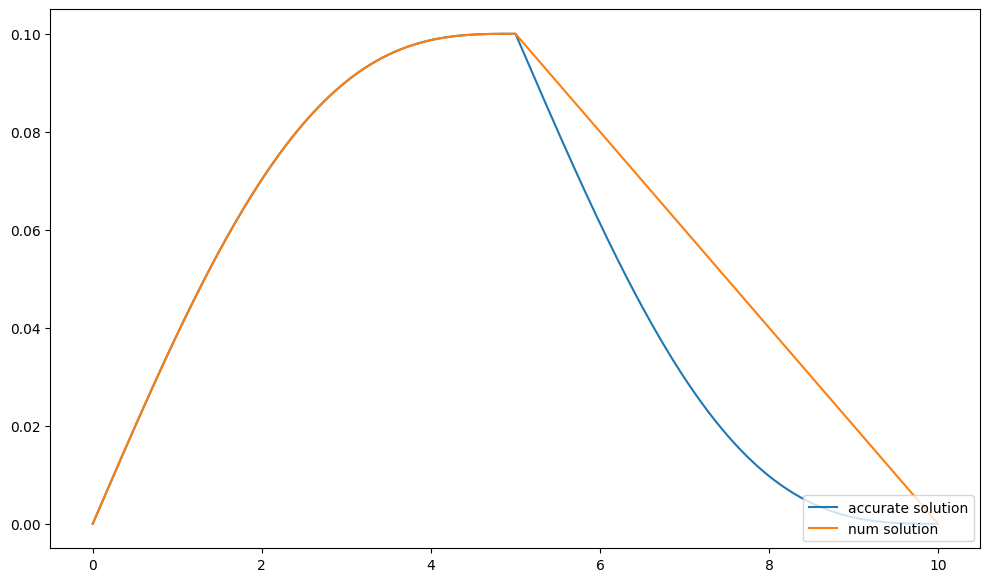

5.0


In [3]:
Euler_init()
n = 2
f = lambda P: np.sqrt(P/P_equal) - n
temp, = fsolve(f,P_equal) 
print(temp,P_equal)
Euler_init(temp)
print(l1,l,n,P)
print(alpha)
def Euler_fun1(x,w):
  return np.vstack((w[1],-delta*np.pi/l1**2*np.sin(alpha*x)))
# def Euler_fun3(x,w):
#   return  np.vstack((w[1],delta*np.pi/l1**2*np.sin(alpha*x)))
# def Euler_fun3(x,w):
#   return  np.vstack((w[1],delta*np.pi/l1**2*(np.sin(alpha*x)-np.pi*np.cos(alpha*x))))
def Euler_fun3(x,w):
  return  np.vstack((w[1],delta/2*alpha**2/E/Jx*((1-1/(l1*alpha))*np.exp(alpha*x)+ (1+1/(l1*alpha))*np.exp(-alpha*x))))
# Краевые условия
def bc_E0(ya, yb): # шарниры
  return np.array([ya[0], yb[0]-delta])
def bc_E1(ya, yb): # шарниры
  return np.array([ya[0]-delta, yb[0]])

totalNodes = 10000
x1 = np.linspace(0, l1, totalNodes)
y1 = np.array(delta/np.pi*(np.sin(alpha*x1)+alpha*x1))
x2 = np.linspace(l1, l-l1, totalNodes)
y2 = np.array(y1[-1]*(1-x2+x2))
x3 = np.linspace(l-l1, l, totalNodes)
y3 = np.array(delta-delta/np.pi*(np.sin(alpha*x1)+alpha*x1))
x = np.hstack([x1,x2,x3])
y = np.hstack([y1,y2,y3])

plt.figure(figsize=(12,7))
plt.plot(x,y,label='accurate solution')
plt.legend(loc='lower right')

w1 = np.zeros((2, x1.shape[0]))
w3 = np.zeros((2, x3.shape[0]))
solbc1 = solve_bvp(Euler_fun1,bc_E0,x1,w1, tol = 1e-10, max_nodes=totalNodes)
solbc3 = solve_bvp(Euler_fun3,bc_E1,x1,w3, tol = 1e-10, max_nodes=totalNodes)
w1 = solbc1.y[0]
w2 = w1[-1]*np.ones(x2.shape[0])
w3 = solbc3.y[0]
w = np.hstack([w1,w2,w3])

plt.plot(x,w,label='num solution')
plt.legend(loc='lower right')
plt.show()
print(l1)


# Вариант Овчинникова

0


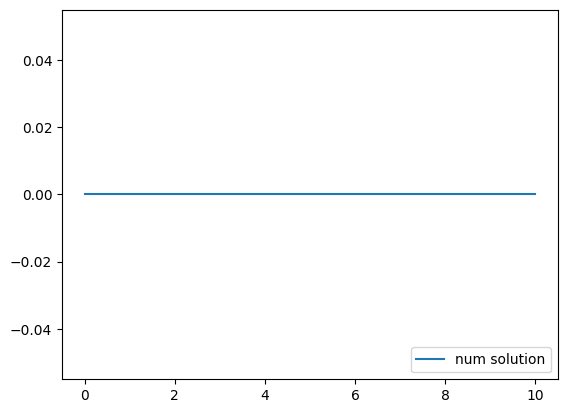

In [4]:
Euler_init()
n = 3
f = lambda P: np.sqrt(P/P_equal) - n
temp, = fsolve(f,P_equal) 
Euler_init(temp)
def Euler_fun(x,w,p):
  k = p[0]
  return np.vstack((w[1],w[2],w[3],k**2*w[2]))
def bc_EC(ya, yb,p): # шарниры
  k = p[0]
  return np.array([ya[0], yb[0]-k,ya[2],yb[1],yb[2]])
totalNodes = 1000
x = np.linspace(0, l, totalNodes)
w = np.zeros((4, x.shape[0]))
solbc = solve_bvp(Euler_fun,bc_EC,x,w, tol = 1e-10, max_nodes=totalNodes,p=[1e-10])
print(solbc.status)
w = solbc.y[0]
plt.plot(x,w,label='num solution')
plt.legend(loc='lower right')

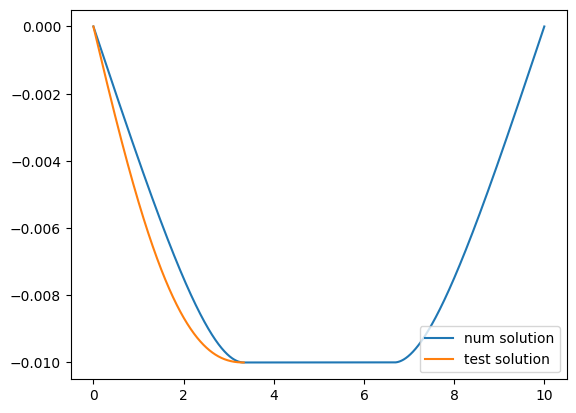

In [5]:
Euler_init()
n = 3
f = lambda P: np.sqrt(P/P_equal) - n
temp, = fsolve(f,P_equal) 
Euler_init(temp)
def Euler_fun(x,w):
  return np.vstack((w[1],w[2],w[3],P/(E*Jx)*w[2]))
# Краевые условия
def bc_ER(ya, yb): # шарниры
  return np.array([ya[0], yb[0]+delta,ya[2],yb[1]])
def bc_EL(ya, yb): # шарниры
  return np.array([ya[0]+delta, yb[0],ya[1],yb[2]])
totalNodes = 1000
x1 = np.linspace(0, l1, totalNodes)
x2 = np.linspace(l1, l-l1, totalNodes)
x3 = np.linspace(l-l1, l, totalNodes)
x = np.hstack([x1,x2,x3])

delta = 0.01

w1 = np.zeros((4, x1.shape[0]))
w3 = np.zeros((4, x3.shape[0]))
solbc1 = solve_bvp(Euler_fun,bc_ER,x1,w1, tol = 1e-10, max_nodes=totalNodes)
solbc3 = solve_bvp(Euler_fun,bc_EL,x1,w3, tol = 1e-10, max_nodes=totalNodes)
w1 = solbc1.y[0]
w2 = w1[-1]*np.ones(x2.shape[0])
w3 = solbc3.y[0]
w = np.hstack([w1,w2,w3])
plt.plot(x,w,label='num solution')
plt.legend(loc='lower right')
#plt.ylim(0

w1 = np.zeros((4, x1.shape[0]))
def Euler_fun(x,w):
  return np.vstack((w[1],w[2],w[3],P/(E*Jx)*w[2]-7800*2*9.8/(E*Jx)))
solbc1 = solve_bvp(Euler_fun,bc_ER,x1,w1, tol = 1e-10, max_nodes=totalNodes)
w1 = solbc1.y[0]
plt.plot(x1,w1,label='test solution')
plt.legend(loc='lower right')
plt.show()


# Урманчеевский вариант

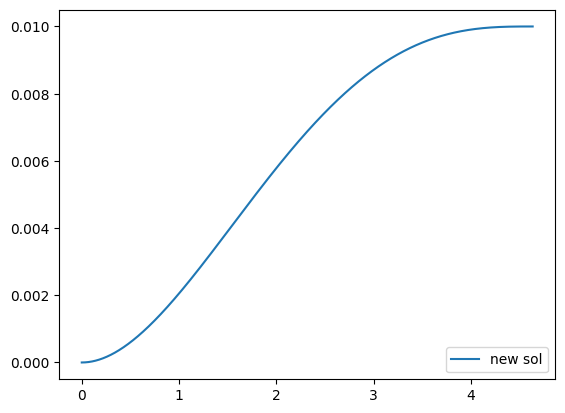

In [6]:
rhol = 7800
g = 9.81
l = np.power(72*(E*Jx)*delta/(rhol*g),1/4)
totalNodes = 10000
x1 = np.linspace(0, l, totalNodes)
y1 = np.array(rhol*g/(E*Jx)*(x1**4/24-l/9*x1**3+l**2/12*x1**2))
plt.plot(x1,y1,label='new sol')
plt.legend(loc='lower right')
plt.show()

# Готовая версия

14730.694472351943 1.8113245143353656e-07


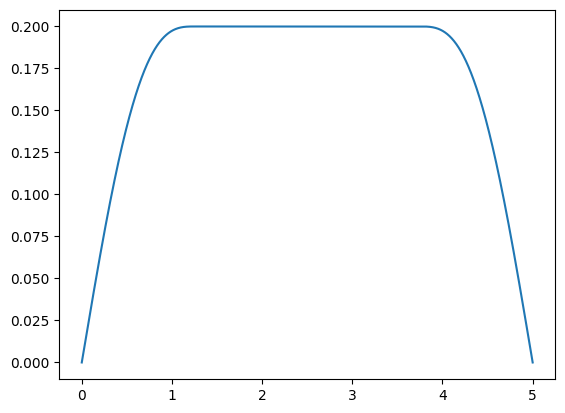

In [7]:
T1 = Rod(l=5,delta=0.2,n=16,bc_id=1)
print(T1.P_equal,T1.Jx)
plt.plot(T1.stacked_x,T1.solution)

# totalNodes = 10000
# x1 = np.linspace(0, l1, totalNodes)
# y1 = np.array(delta/np.pi*(np.sin(alpha*x1)+alpha*x1))
# x2 = np.linspace(l1, l-l1, totalNodes)
# y2 = np.array(y1[-1]*(1-x2+x2))
# x3 = np.linspace(l-l1, l, totalNodes)
# y3 = np.reverse
# x = np.hstack([x1,x2,x3])
# y = np.hstack([y1,y2,y3])

# plt.figure(figsize=(12,7))
# plt.plot(x,y,label='accurate solution')
# plt.legend(loc='lower right')
plt.show()

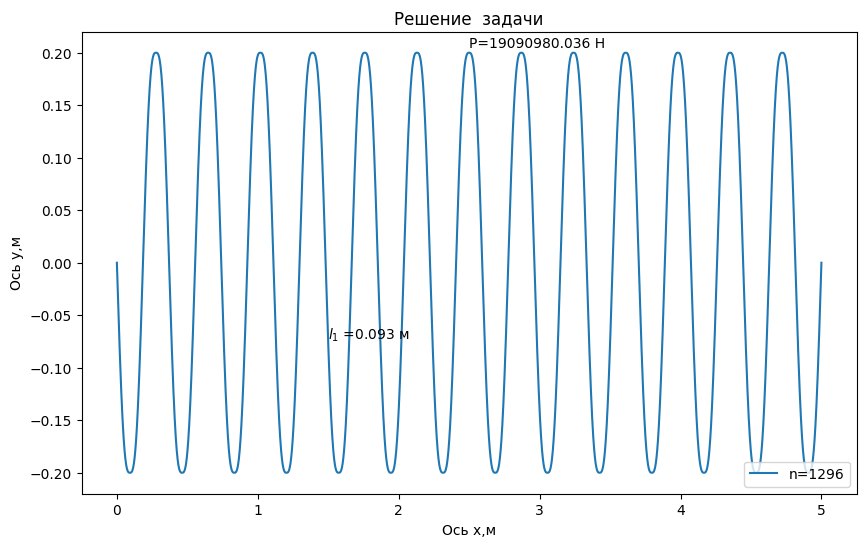

In [35]:
R1 = CanalRod(l=5,delta=0.2,n=1296)
set_plot(xlabel='Ось x,м',ylabel='Ось y,м',title='Решение  задачи')
plt.plot(R1.x,R1.solution,label=f'n={R1.n}')
plt.text(2.5,R1.findY(2.5)+0.005,f'P={R1.P:10.3f} Н')
plt.text(1.5,R1.findY(1.5)+0.005,r'$l_1$ ='+ f'{R1.l1:5.3f} м')
plt.legend(loc='lower right')



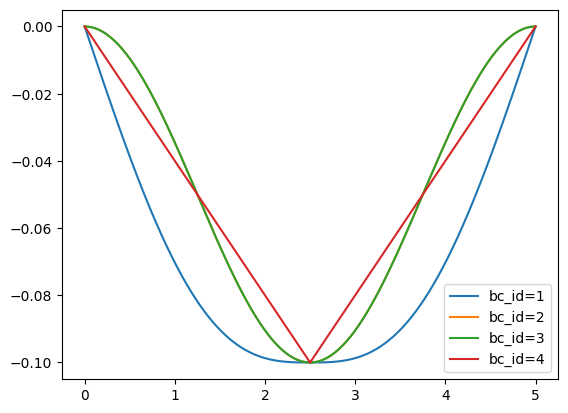

In [9]:
R1 = CanalRod(n=4)
plt.plot(R1.x,R1.solution,label=f'bc_id={R1.bc_id}')
plt.legend(loc='lower right')
R1.bc_id = 2
plt.plot(R1.x,R1.solution,label=f'bc_id={R1.bc_id}')
plt.legend(loc='lower right')
R1.bc_id = 3
plt.plot(R1.x,R1.solution,label=f'bc_id={R1.bc_id}')
plt.legend(loc='lower right')
R1.bc_id = 4
plt.plot(R1.x,R1.solution,label=f'bc_id={R1.bc_id}')
plt.legend(loc='lower right')